<a href="https://colab.research.google.com/github/jlsgodev/dados/blob/main/Lista_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Desafios de Estatística

### 1. Amostragem Aleatória Simples
   - Desafio: Crie um DataFrame com 1000 registros de alunos, incluindo colunas para "ID", "Idade" e "Nota". Realize uma amostragem aleatória simples de 100 alunos e analise a média e a mediana das notas da amostra.
     - Objetivo: Praticar a amostragem e entender as medidas de tendência central.

In [ ]:
import pandas as pd
import  numpy as np

#  Criando um conjunto de dados com 1000 registros de alunos
alunos = pd.DataFrame({
    'ID': range(1, 1001),
    'Idade': np.random.randint(18, 30, size=1000),
    'Nota': np.random.randint(0, 100, 1000)
})
# Realizar uma amostragem aleatoria de 100 alunos
amostra = alunos.sample(n=100, random_state=1)

# Calculando a média e a mediana das notas da amostra.
media = amostra['Nota'].mean()
mediana = amostra['Nota'].median()

print(f'Média das notas da amostra: {media}')
print(f'Mediana das notas da amostra: {mediana}')

Média das notas da amostra: 52.17
Mediana das notas da amostra: 54.0


2. Boxplot e Identificação de Outliers
   - Desafio: Use o DataFrame criado no desafio anterior e adicione uma coluna "Nota" com notas variando de 0 a 100. Plote um boxplot para as notas e identifique os outliers.
   - Objetivo: Visualizar a distribuição das notas e entender o conceito de outliers.

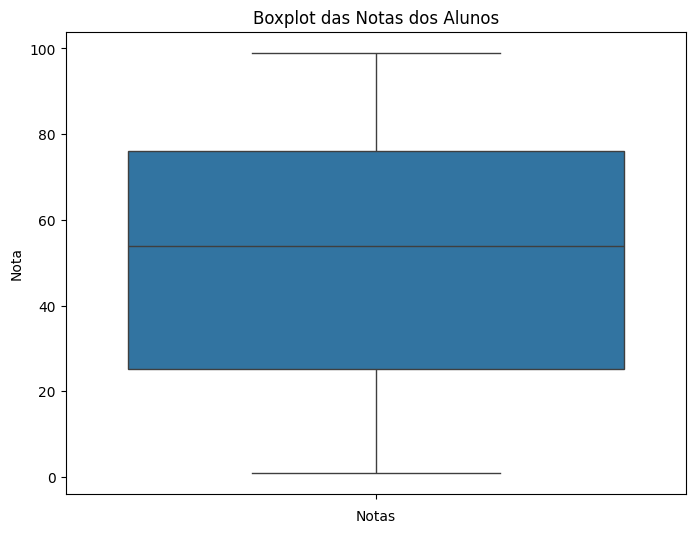

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando um boxplot para as notas
plt.figure(figsize=(8, 6))
sns.boxplot(amostra['Nota'])
plt.title('Boxplot das Notas dos Alunos')
plt.xlabel('Notas')
plt.show()

3. Histograma para Frequência
   - Desafio: Plote um histograma das idades dos alunos do DataFrame anterior, dividindo as idades em intervalos (bins) apropriados.
   - Objetivo: Analisar a frequência das idades e entender a distribuição de dados.

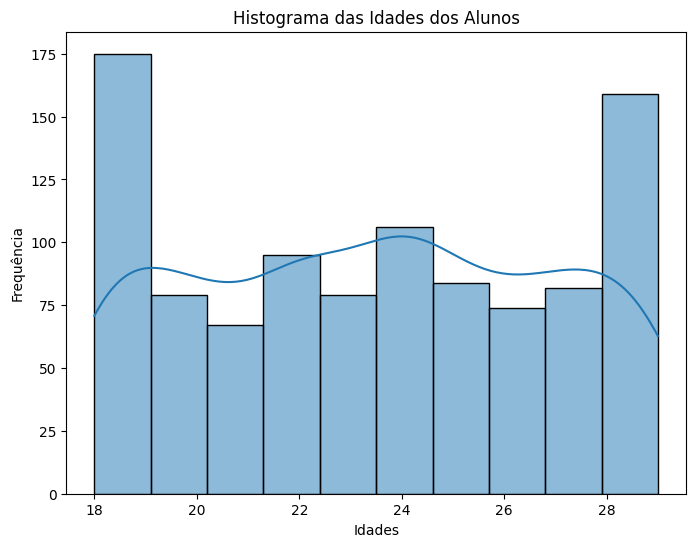

In [ ]:
# Plotando um histograma das idades dos alunos

plt.figure(figsize=(8, 6))
sns.histplot(alunos['Idade'], bins=10, kde=True)
plt.title('Histograma das Idades dos Alunos')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.show()


4 Cálculo de Covariância
   - Desafio: Adicione uma coluna "Horas de Estudo" ao DataFrame anterior. Calcule a covariância entre "Horas de Estudo" e "Nota".
   - Objetivo: Compreender a relação entre duas variáveis.


In [ ]:

#  Adicionando uma coluna horas de estudo
alunos['Horas de Estudo'] = np.random.randint(1, 10, 1000)

# calculando a Calcule a covariância entre "Horas de Estudo" e "Nota"
covariancia = alunos [['Horas de Estudo', 'Nota' ]].cov().iloc[0, 1]
print(f'Covariância entre Horas de Estudo e Nota: {covariancia}')

Covariância entre Horas de Estudo e Nota: 1.0247367367367324


5. Regressão Linear Simples
   - Desafio: Com base nas colunas "Horas de Estudo" e "Nota", ajuste um modelo de regressão linear simples. Plote a linha de regressão junto com os dados.
   - Objetivo: Aprender sobre modelagem e previsão com regressão.


Coeficiente angular: 0.1521204181635326, Intercepto: 48.1909264956574


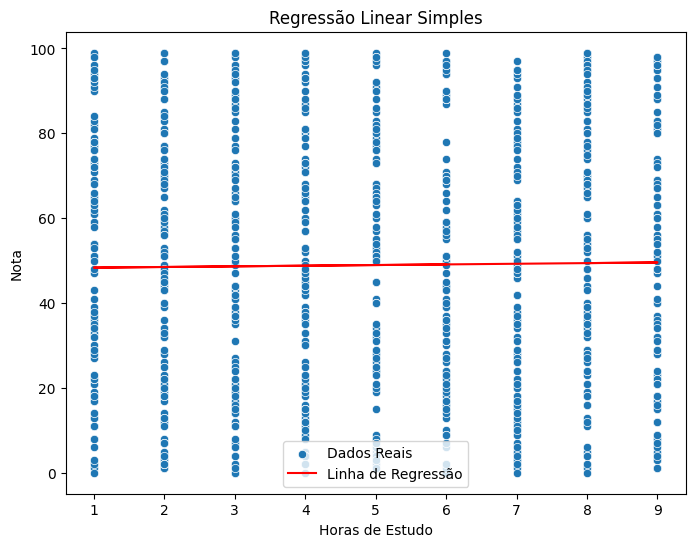

In [ ]:
from sklearn.linear_model import LinearRegression

# Definindo variáveis independentes e dependentes
X = alunos[['Horas de Estudo']]  # Variável independente
y = alunos['Nota']    # Variável dependente

# Criando o modelo de regressão
modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes
print(f"Coeficiente angular: {modelo.coef_[0]}, Intercepto: {modelo.intercept_}")

# Predições
alunos['Nota_Preditos'] = modelo.predict(X)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Horas de Estudo', y='Nota', data=alunos, label='Dados Reais')
plt.plot(alunos['Horas de Estudo'], alunos['Nota_Preditos'], color='red', label='Linha de Regressão')
plt.title('Regressão Linear Simples')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota')
plt.legend()
plt.show()

6. Teste Qui-Quadrado
   - Desafio: Crie um DataFrame com a preferência de cursos (por exemplo, "Matemática", "Física", "Química") entre alunos de diferentes idades. Realize um teste qui-quadrado para verificar se há associação entre a idade e a preferência de curso.
   - Objetivo: Aplicar o teste qui-quadrado para dados categóricos.


In [ ]:
from scipy import stats

# Criando um DataFrame com preferência de cursos
cursos = pd.DataFrame({
    'ID': range(1, 101),
    'Idade': np.random.randint(18, 30, 100),
    'Preferência': np.random.choice(['Matemática', 'Física', 'Química'], 100)
})

# Criando uma tabela de contingência
tabela = pd.crosstab(cursos['Idade'], cursos['Preferência'])
print("Tabela de Contingência:")
print(tabela)

# Realizando o teste qui-quadrado
chi2, p_valor, _, _ = stats.chi2_contingency(tabela)
print(f"Estatística qui-quadrado: {chi2}, p-valor: {p_valor}")

Tabela de Contingência:
Preferência  Física  Matemática  Química
Idade                                   
18                3           3        1
19                0           3        7
20                0           2        3
21                2           2        4
22                4           4        7
23                3           4        2
24                2           2        2
25                5           3        2
26                2           2        0
27                5           7        2
28                1           2        1
29                4           2        2
Estatística qui-quadrado: 21.901800907177254, p-valor: 0.4657630165463036


7. K-Means para Agrupamento
   - Desafio: Geração de um conjunto de dados com características de clientes (por exemplo, "Renda" e "Gastos"). Aplique o algoritmo K-Means para agrupar os clientes e visualize os grupos.
   - Objetivo: Entender a técnica de agrupamento e suas aplicações.


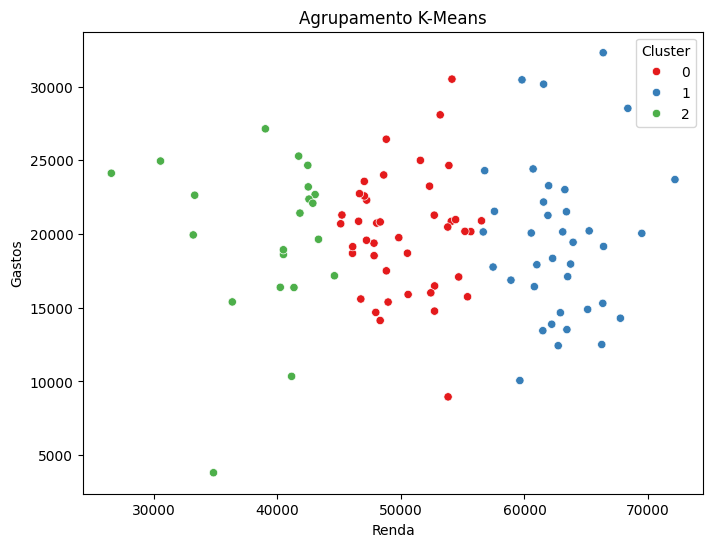

In [ ]:
from sklearn.cluster import KMeans

# Criando um DataFrame com características de clientes
clientes = pd.DataFrame({
    'ID': range(1, 101),
    'Renda': np.random.normal(50000, 10000, 100),
    'Gastos': np.random.normal(20000, 5000, 100)
})

# Selecionando as variáveis para agrupamento
X = clientes[['Renda', 'Gastos']]

# Criando o modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=1)
clientes['Cluster'] = kmeans.fit_predict(X)

# Gráfico de dispersão com agrupamento
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Renda', y='Gastos', hue='Cluster', data=clientes, palette='Set1')
plt.title('Agrupamento K-Means')
plt.xlabel('Renda')
plt.ylabel('Gastos')
plt.legend(title='Cluster')
plt.show()


8. Análise de Componentes Principais (PCA)
   - Desafio: Use um conjunto de dados multivariados (como o conjunto de dados Iris). Aplique PCA e visualize os primeiros dois componentes principais.
   - Objetivo: Reduzir a dimensionalidade dos dados e explorar suas variáveis.


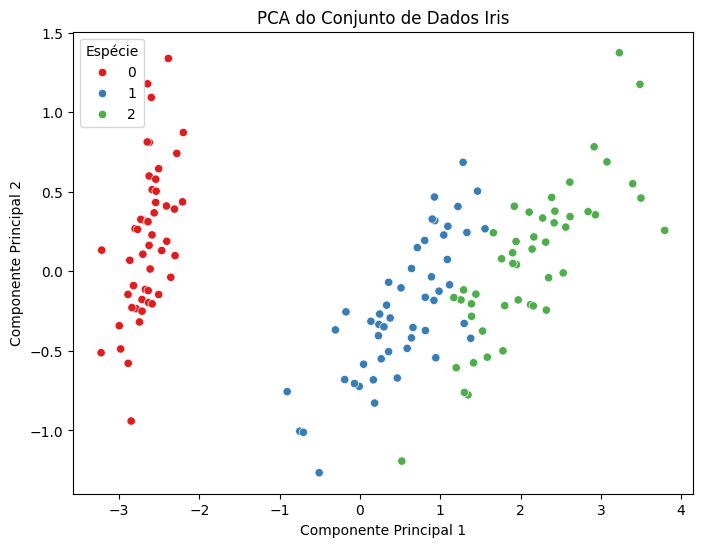

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['Espécie'] = y

# Gráfico de dispersão dos componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Espécie', data=pca_df, palette='Set1')
plt.title('PCA do Conjunto de Dados Iris')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Espécie')
plt.show()

9. Distribuição Binomial
   - Desafio: Simule uma situação em que você realiza 10 tentativas de um experimento com uma probabilidade de sucesso de 0,3. Calcule e visualize a distribuição binomial para 0 a 10 sucessos.
   - Objetivo: Entender e aplicar a distribuição binomial.


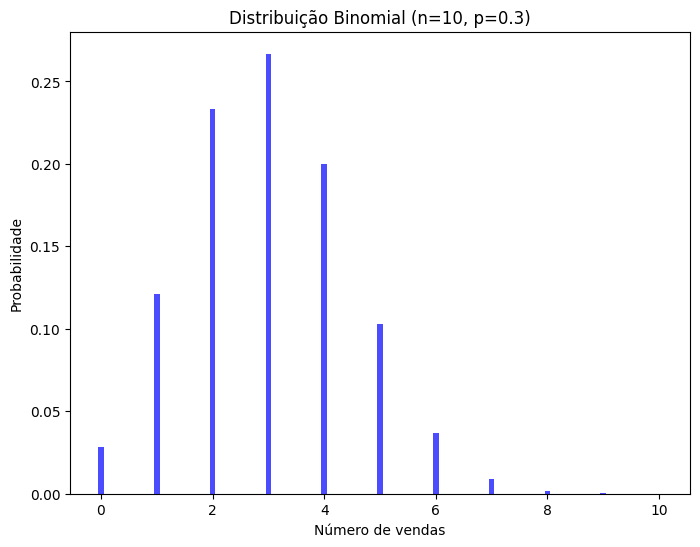

In [ ]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros para a distribuição binomial
n = 10  # número de experimentos (exemplo: 10 visitas)
p = 0.3  # probabilidade de sucesso em cada experimento (exemplo: 30% de chance de venda por visita)

# Gerar valores binomiais
x = np.arange(0, n+1)
binom_pmf = binom.pmf(x, n, p)

# Plotar a distribuição binomial
plt.figure(figsize=(8,6))
plt.bar(x, binom_pmf, width=0.1, color='b', alpha=0.7)
plt.xlabel('Número de vendas')
plt.ylabel('Probabilidade')
plt.title(f'Distribuição Binomial (n={n}, p={p})')
plt.show()

10. Análise de Séries Temporais
    - Desafio: Crie uma série temporal simulada de vendas mensais de um produto ao longo de dois anos. Plote os dados e analise a tendência.
    - Objetivo: Aprender a manipular e analisar dados de séries temporais.


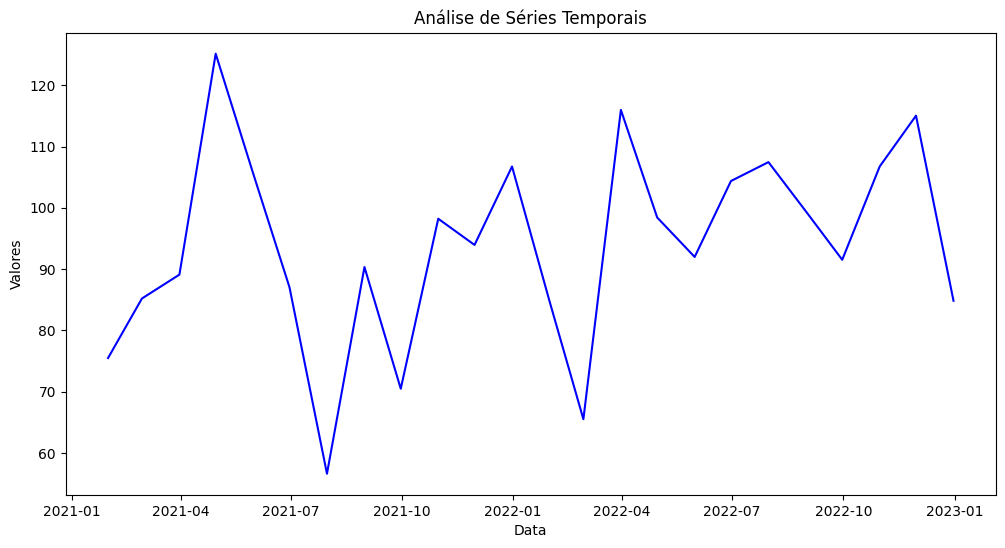

In [ ]:
# Simulando dados de séries temporais
date_range = pd.date_range(start='2021-01-01', periods=24, freq='M')
valores = np.random.normal(100, 20, 24)
serie_temporal = pd.DataFrame({'Data': date_range, 'Valores': valores})
serie_temporal.set_index('Data', inplace=True)

# Gráfico da série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index, serie_temporal['Valores'], color='blue')
plt.title('Análise de Séries Temporais')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()